## Assignment 05:

Acquire power data (source) for at least 10 days and not more than 40 days. Load the data into a Jupyter Notebook. Create two bar graphs of the power consumption per hour. One bar graph has 24 bars; one bar graph has 24*(number of days) bars. Submit the .ipynb file containing the analysis and the generated pictures.


In [1]:
import pandas as pd

In [34]:
df1 = pd.read_csv('RollingSystemDemand_20211031_1533.csv')
df2 = pd.read_csv('RollingSystemDemand_20211031_1538.csv')
df1.head()

,HDR,ROLLING SYSTEM DEMAND
VD,20211016000000,23256.0
VD,20211016000500,23285.0
VD,20211016001000,23175.0
VD,20211016001500,23064.0
VD,20211016002000,23039.0


In [35]:
df1.drop(df1.tail(1).index,inplace=True)
df2.drop(df2.tail(1).index,inplace=True)
df2.tail()

,HDR,ROLLING SYSTEM DEMAND
VD,20211028221500,26059.0
VD,20211028222000,25806.0
VD,20211028222500,25558.0
VD,20211028223000,25281.0
VD,20211028223500,25167.0


In [38]:
df3 = df1.append([df1,df2])
df3.head()

,HDR,ROLLING SYSTEM DEMAND
VD,20211016000000,23256.0
VD,20211016000500,23285.0
VD,20211016001000,23175.0
VD,20211016001500,23064.0
VD,20211016002000,23039.0


In [42]:
df3['HDR'] = df3['HDR'].astype(str)

In [43]:
df_new = pd.DataFrame(df3["HDR"])
df3["Date"] = pd.to_datetime(df_new["HDR"]).dt.date
df3["Time"] = pd.to_datetime(df_new["HDR"]).dt.time
df3["Hours"] = pd.to_datetime(df_new["HDR"]).dt.hour
df3

,HDR,ROLLING SYSTEM DEMAND,Date,Time,Hours
VD,20211016000000,23256.0,2021-10-16,00:00:00,0
VD,20211016000500,23285.0,2021-10-16,00:05:00,0
VD,20211016001000,23175.0,2021-10-16,00:10:00,0
VD,20211016001500,23064.0,2021-10-16,00:15:00,0
VD,20211016002000,23039.0,2021-10-16,00:20:00,0
...,...,...,...,...,...
VD,20211028221500,26059.0,2021-10-28,22:15:00,22
VD,20211028222000,25806.0,2021-10-28,22:20:00,22
VD,20211028222500,25558.0,2021-10-28,22:25:00,22
VD,20211028223000,25281.0,2021-10-28,22:30:00,22


Bar graph with 24 bars

<AxesSubplot:title={'center':'power consumption on hourly basis'}, xlabel='Hours', ylabel='Power consumption'>

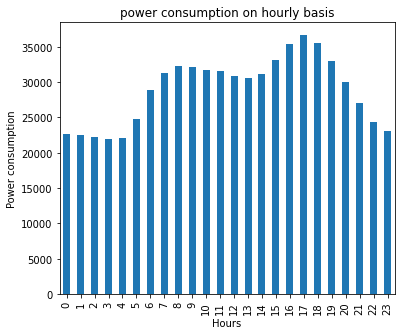

In [69]:
df_hours = df3.groupby(['Hours'])['ROLLING SYSTEM DEMAND'].mean()
df_hours.plot(
    kind='bar', 
    title='power consumption on hourly basis', 
    ylabel='Power consumption',
    xlabel='Hours', 
    figsize=(6, 5)
)

The other way to obtain the above bar graph is by using plotly express. The code for that is as follows:

In [72]:
import plotly.express as px
fig = px.bar(
    df3,
    x="Hours",
    y="ROLLING SYSTEM DEMAND",
    title="Hourly Average Usage",
    color='Time',
    labels={"Time":"Hours","ROLLING SYSTEM DEMAND":"Power Consumption"}
    
)
fig.show()

Bar graph has 24*(number of days) bars.

<AxesSubplot:title={'center':'Hourly average over given number of days'}, xlabel='Hour and date', ylabel='Power usage'>

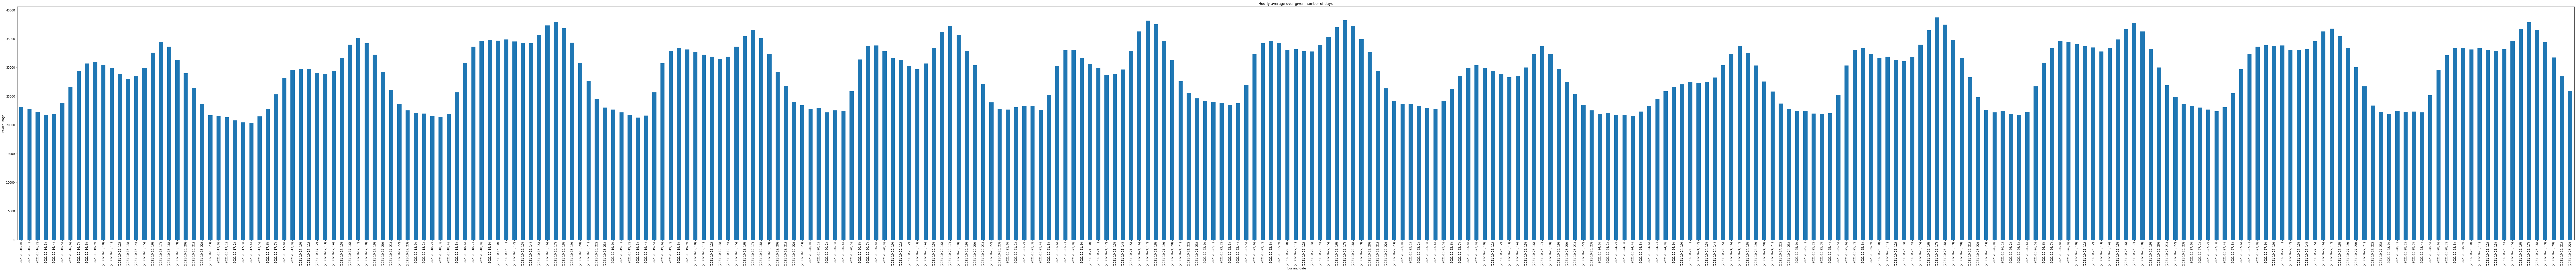

In [55]:
df_days = df3.groupby(['Date','Hours'])['ROLLING SYSTEM DEMAND'].mean()
df_days.plot(
    kind='bar', 
    title='Hourly average over given number of days', 
    ylabel='Power usage',
    xlabel='Hour and date', 
    figsize=(160,15)
)